In [1]:
import pandas as pd
import os
import json
from  builtins import any as b_any
from csv import writer
import matplotlib.pyplot as plt

In [12]:
def plot_year_distribution(df):
    
    plt.rcParams["figure.figsize"] = (25,10)
    ax = df.groupby('year')['source_name'].count().plot(kind='bar', stacked=True)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylabel('# articles (millions)', fontsize = 26)
    plt.xlabel('Year', fontsize = 26)                                                                                                                                                                                                                                                                                                      

    rects = ax.patches

    # Make some labels.
    labels = ["label%d" % i for i in range(len(rects))]

    for rect in rects:
        height = rect.get_height()
        label_text = f'{int(height)}'
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label_text,
                ha='center', va='bottom', fontsize=20)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
    plt.tight_layout()
    plt.savefig('/homenfs/l.bellomo1/datasets/new_attempt_classifier/graphs/n_articles_year.png')
    plt.show()

In [13]:
def plot_country_media_distribution(df):

    plt.rcParams["figure.figsize"] = (25,10)
    ax = df.groupby(['country','political_leaning'])['source_name'].nunique().unstack().plot(kind='bar', stacked=True)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylabel('# media outlet', fontsize = 26)
    plt.xlabel('Country', fontsize = 26)
    plt.legend(prop={'size': 20}, framealpha=0.2, loc='upper left')

    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        
        # The height of the bar is the data value and can be used as the label
        label_text = f'{int(height)}'  # f'{height:.2f}' to format decimal values

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20, color='black')
    plt.tight_layout()
    plt.savefig('/homenfs/l.bellomo1/datasets/new_attempt_classifier/graphs/n_media_country.png')
    plt.show()

In [14]:
def plot_country_articles_distribution(df):

    plt.rcParams["figure.figsize"] = (25,10)
    ax = df.groupby(['country','political_leaning'])['source_name'].count().unstack().plot(kind='bar', stacked=True)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel('# articles (millions)', fontsize = 20)
    plt.xlabel('Country', fontsize = 20)
    plt.legend(prop={'size': 14}, framealpha=0.2, loc='upper left')

    plt.tight_layout()
    #plt.savefig('/home/morini/mydata/ebu_project/eurotopics_data/articles_country_newattempt.png')
    plt.savefig('/homenfs/l.bellomo1/datasets/new_attempt_classifier/graphs/n_articles_country.png')
    plt.show()

In [15]:
def plot_domain_articles_distribution(df):

    plt.rcParams["figure.figsize"] = (40,10)
    ax = df.groupby(['source_name','political_leaning'])['source_name'].count().unstack().plot(kind='bar', stacked=True)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel('# articles (millions)', fontsize = 20)
    plt.xlabel('Media Outlet', fontsize = 20)
    plt.legend(prop={'size': 14}, framealpha=0.2, loc='upper left')

    plt.tight_layout()
    plt.savefig('/homenfs/l.bellomo1/datasets/new_attempt_classifier/graphs/media_outlet_political_leaning.png')
    plt.show()

In [16]:
def plot_country_media_sources(df): # TODO: I'm not able to plot figure in subplots they remain empty

    countries = list(df.country.unique())
    n_col, n_row = 4, len(countries) // 4
    
    lenght_per_fig, height_per_fig = 10, 30
    fig, ax = plt.subplots(n_row, n_col, figsize=(lenght_per_fig*n_row, height_per_fig*n_col))
    color_map = {
        'Centre-left': 'tab:blue',
        'Liberal': 'tab:red',
        'Conservative': 'tab:orange',
        'Left-wing': 'tab:green',
        'Right-wing': 'tab:brown',
        'Liberal-conservative' : 'tab:purple'
    }

    for i, country in enumerate(countries):
        row = i // n_col
        col = i % n_col 
        tmp = pd.DataFrame(all_data.loc[all_data['country'] == country].groupby(['source_name','political_leaning'])['source_name'].count().unstack())
        tmp = tmp.fillna(0)
        labels = list(tmp.index)
        for political_leaning in list(tmp.columns):
            ax[row, col].bar(labels, tmp[political_leaning].values, label=political_leaning, color=[color_map[political_leaning]])

        ax[row, col].set_title(country, size=40)
        ax[row, col].set_ylabel('# articles (millions)', size=25) 
        ax[row, col].set_xlabel('Media Outlet', size=25) 
        ax[row, col].xaxis.set_tick_params(labelsize=25, rotation=90) 
        ax[row, col].yaxis.set_tick_params(labelsize=25) 
        ax[row, col].legend(prop={"size":20})
        

    fig.tight_layout(pad=1)
    plt.savefig('/homenfs/l.bellomo1/datasets/new_attempt_classifier/graphs/country_media.png')
    fig.show()

In [17]:
def plot_domain_articles_year_distribution(df):

    plt.rcParams["figure.figsize"] = (50,20)
    ax = df.groupby(['source_name','year'])['source_name'].count().unstack().plot(kind='bar', stacked=True)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel('# articles (millions)', fontsize = 20)
    plt.xlabel('Media Outlet', fontsize = 20)
    plt.legend(prop={'size': 14}, framealpha=0.2, loc='upper left')

    plt.tight_layout()
    plt.savefig('/homenfs/l.bellomo1/datasets/new_attempt_classifier/graphs/media_outlet_year.png')
    plt.show()

## All Eurotopics Datasets without constraints
- all data cleaned e not cleaned
- test bias e non bias
- training
- dataset without punctuation
- distribution plots
- no topic restrinction

### ALL EU DATA 

This dataset contains all articles extracted on common crawls and was obtained by merging 'merged.csv' and 'attempt_2020_dataset.csv'. It will be used to build the training set, the test set biased, the test set non biased
- we have the original dataset (not cleaned) in /homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/all_data_eu.csv
- the cleaned dataset obtained running text_cleaning_punt.py is in /homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/all_data_eu_cleaned.csv
- from 2016 to 2021
- 192 media outlets
- 28 countries (27 EU + United Kingdom)
- we drop all nan values
- we plot various type of distribution
- we noticed that some media have the same name, so we decided to remove it to avoid confusion: duplicated_media = ['Deutsche Welle', 'The Herald', 'Delfi', 'Diena', 'Capital','Fokus', 'Kurir', 'Dnevnik', 'ABC', 'Público', 'Metro','Kathimerini', 'Politis']

In [9]:
all_data = pd.read_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/all_data_eu_cleaned.csv') # opening the cleaned file for defining tess sets and training set
#all_data = all_data.loc[all_data.year.isin([2016,2017,2018,2019,2020,2021])]
duplicated_media = ['Deutsche Welle', 'The Herald', 'Delfi', 'Diena', 'Capital',
       'Fokus', 'Kurir', 'Dnevnik', 'ABC', 'Público', 'Metro',
       'Kathimerini', 'Politis']
#all_data = all_data.loc[~all_data.source_name.isin(duplicated_media)]
all_data

title  \
0         Vonn meldet sich in Lake Louise per Skype-Anru...   
1         Baustelle Pilgramgasse: Die Neuordnung des Wie...   
2         Nachrichten-Überblick: Die wichtigsten Themen ...   
3             Der Fernsehwahlkampf der Emotionen ist vorbei   
4         ÖVP wächst und liegt in Jois weiter auf dem er...   
...                                                     ...   
15665790  Σε καραντίνα ο Πρόεδρος της Πορτογαλίας λόγω κ...   
15665791  Μπαχτσελί: Πρέπει να ετοιμαστούμε για να εισβά...   
15665792  Κοροναϊός: Ο "Ε.Τ." σας δίνει απαντήσεις σε 9 ...   
15665793  Μαξίμου για δήλωση Τσίπρα: Δεν ξέρει τι σημαίν...   
15665794  Χατζηδάκης: Προτεραιότητα η προστασία του θεμε...   

                                                   maintext  \
0         "Positive Erklärung" In dieser möchte Vonn noc...   
1         "Solche Arbeiten versuchen wir natürlich unter...   
2         Guten Morgen... ... aus dem KURIER-Newsroom. W...   
3         Die letzten Video-Lücken sind abgedichtet: Kle...   
4         Die ÖVP hat in Jois ihren Spitzenplatz verteid...   
...                                                     ...   
15665790  Newsroom   Μοιράσου το άρθρο μέσω: 0 Shares Fa...   
15665791  ΜΑΝΩΛΗΣ ΚΩΣΤΙΔΗΣ Μοιράσου το άρθρο μέσω: 0 Sha...   
15665792  ΜΑΡΙΑ-ΝΙΚΗ ΓΕΩΡΓΑΝΤΑ Μοιράσου το άρθρο μέσω: 0...   
15665793  Newsroom   Μοιράσου το άρθρο μέσω: 0 Shares Fa...   
15665794  Newsroom   Μοιράσου το άρθρο μέσω: 0 Shares Fa...   

                 date_publish language           source_domain  \
0         2018-11-29 17:23:30       de           www.kurier.at   
1         2019-02-15 04:00:00       de           www.kurier.at   
2         2019-05-23 05:26:10       de           www.kurier.at   
3         2019-09-27 14:55:55       de           www.kurier.at   
4         2019-09-29 15:45:34       de           www.kurier.at   
...                       ...      ...                     ...   
15665790  2020-03-09 09:30:12       el  www.eleftherostypos.gr   
15665791  2020-02-11 09:28:17       el  www.eleftherostypos.gr   
15665792  2020-01-28 08:26:00       el  www.eleftherostypos.gr   
15665793  2020-01-10 13:39:51       el  www.eleftherostypos.gr   
15665794  2020-01-25 16:51:31       el  www.eleftherostypos.gr   

                                                         id  \
0         b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...   
1         aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...   
2         ac84b6032c2381adbab9963443f280cc62226ba9804ee8...   
3         2f209f932ecb28e8919125312577376e9b3a1458b19c92...   
4         318e314f9c0480ba9f1ed4e51987f784ebf294578fc13d...   
...                                                     ...   
15665790  c135fa6e73be25929f1d544a7a83f401d64fad95da9d78...   
15665791  567f2cd8be66415e831a0e3d80f598303f44b16ac37d54...   
15665792  284fe550fce88045fb2e9025ecef619229359596e9034f...   
15665793  a09fa03e18308e94ee9d436fc9957ec5f72681f6e4d2f8...   
15665794  35e1296136f95510c94ecd5d0bb0e21344135f69d09092...   

                         date    year       source_name     political_leaning  \
0         2018-11-29 17:23:30  2018.0            Kurier               Liberal   
1         2019-02-15 04:00:00  2019.0            Kurier               Liberal   
2         2019-05-23 05:26:10  2019.0            Kurier               Liberal   
3         2019-09-27 14:55:55  2019.0            Kurier               Liberal   
4         2019-09-29 15:45:34  2019.0            Kurier               Liberal   
...                       ...     ...               ...                   ...   
15665790  2020-03-09 09:30:12  2020.0  Eleftheros Typos  Liberal-conservative   
15665791  2020-02-11 09:28:17  2020.0  Eleftheros Typos  Liberal-conservative   
15665792  2020-01-28 08:26:00  2020.0  Eleftheros Typos  Liberal-conservative   
15665793  2020-01-10 13:39:51  2020.0  Eleftheros Typos  Liberal-conservative   
15665794  2020-01-25 16:51:31  2020.0  Eleftheros Typos  Liberal-conservative   

          country

In [10]:
all_data.political_leaning.value_counts()

Conservative            4553876
Liberal                 3597700
Centre-left             3202951
Left-wing               1531738
Liberal-conservative    1516743
Right-wing              1262787
Name: political_leaning, dtype: int64

In [21]:
#all_data.to_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/all_data_eu.csv', index=False)

In [9]:
print('# media outlets', all_data.source_name.nunique())

# media outlets 192


In [10]:
print('# country', all_data.country.nunique())

# country 28


In [11]:
print('country', all_data.country.unique())

country ['Austria' 'Finland' 'Sweden' 'Germany' 'Portugal' 'France'
 'United Kingdom' 'Hungary' 'Greece' 'Estonia' 'Slovenia' 'Croatia'
 'Spain' 'Ireland' 'Italy' 'Cyprus' 'Malta' 'Luxembourg' 'Belgium'
 'Romania' 'Netherlands' 'Denmark' 'Poland' 'Bulgaria' 'Czech Republic'
 'Latvia' 'Lithuania' 'Slovakia']


In [12]:
all_data.isna().sum()

title                0
maintext             0
date_publish         0
language             0
source_domain        0
id                   0
date                 0
year                 0
source_name          0
political_leaning    0
country              0
dtype: int64

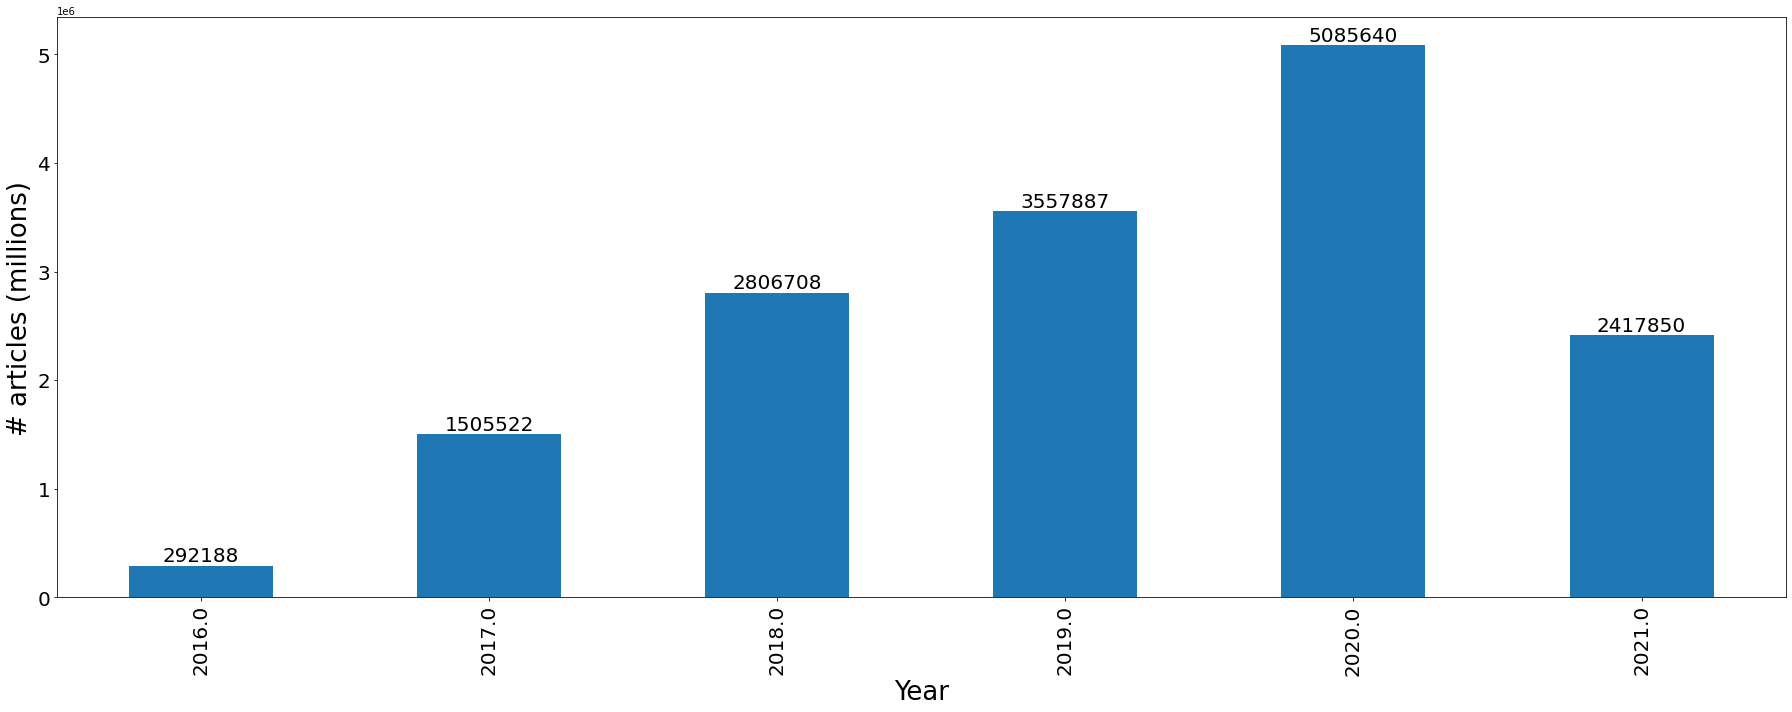

In [13]:
plot_year_distribution(all_data)

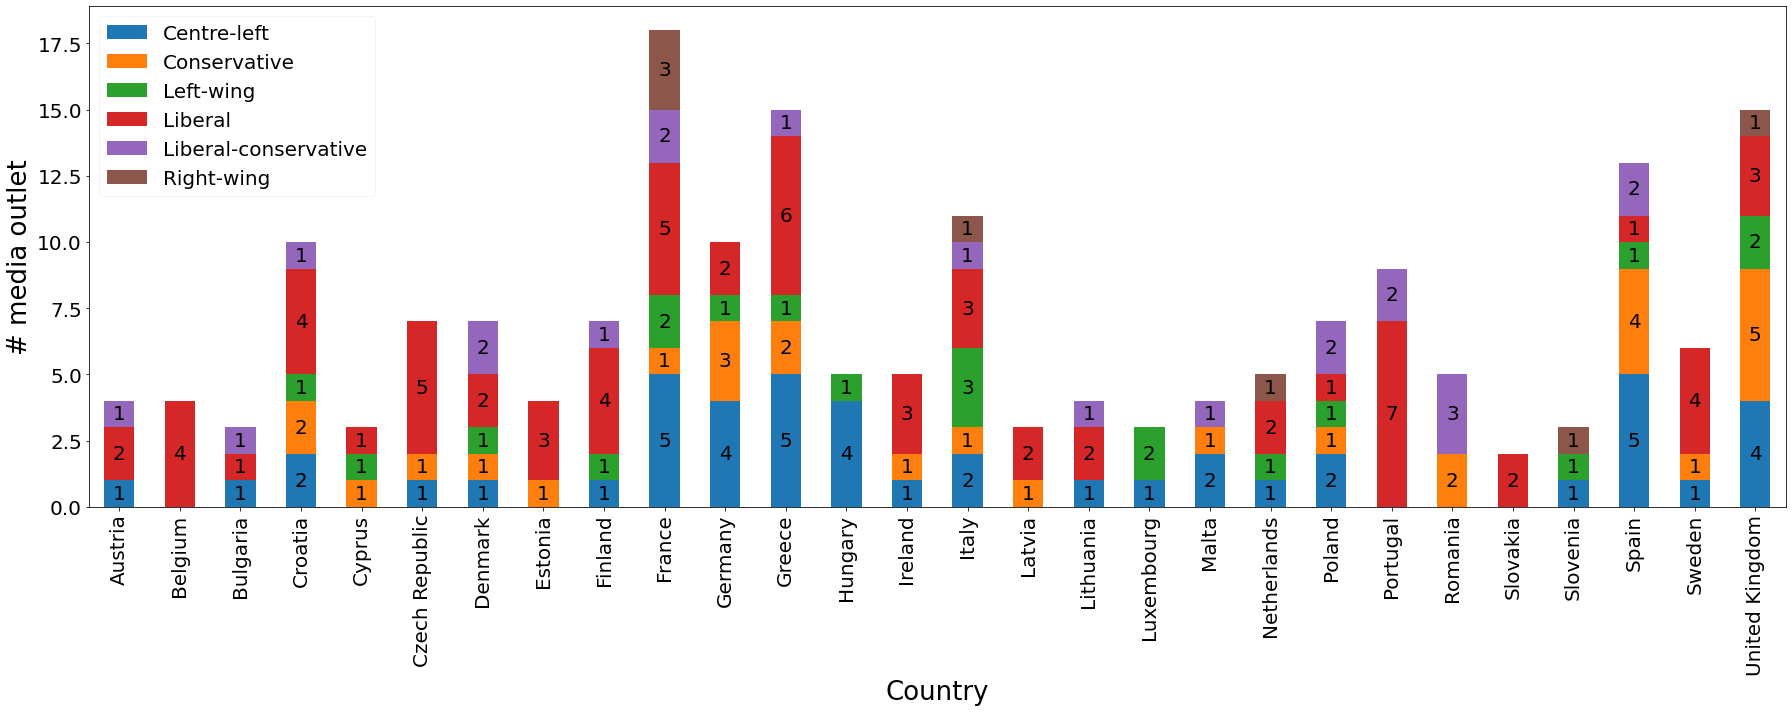

In [14]:
plot_country_media_distribution(all_data)

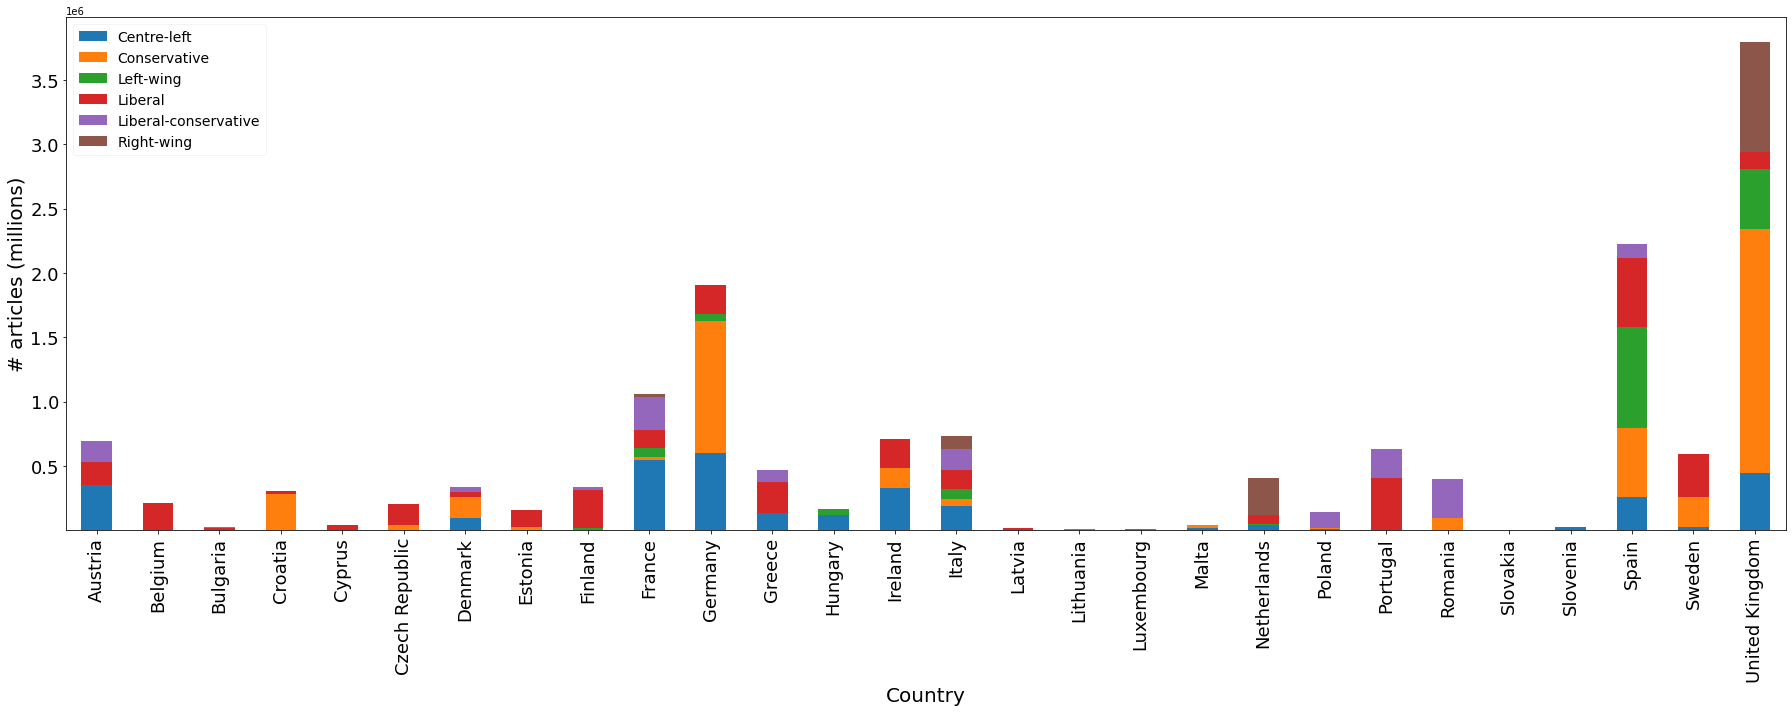

In [15]:
plot_country_articles_distribution(all_data)

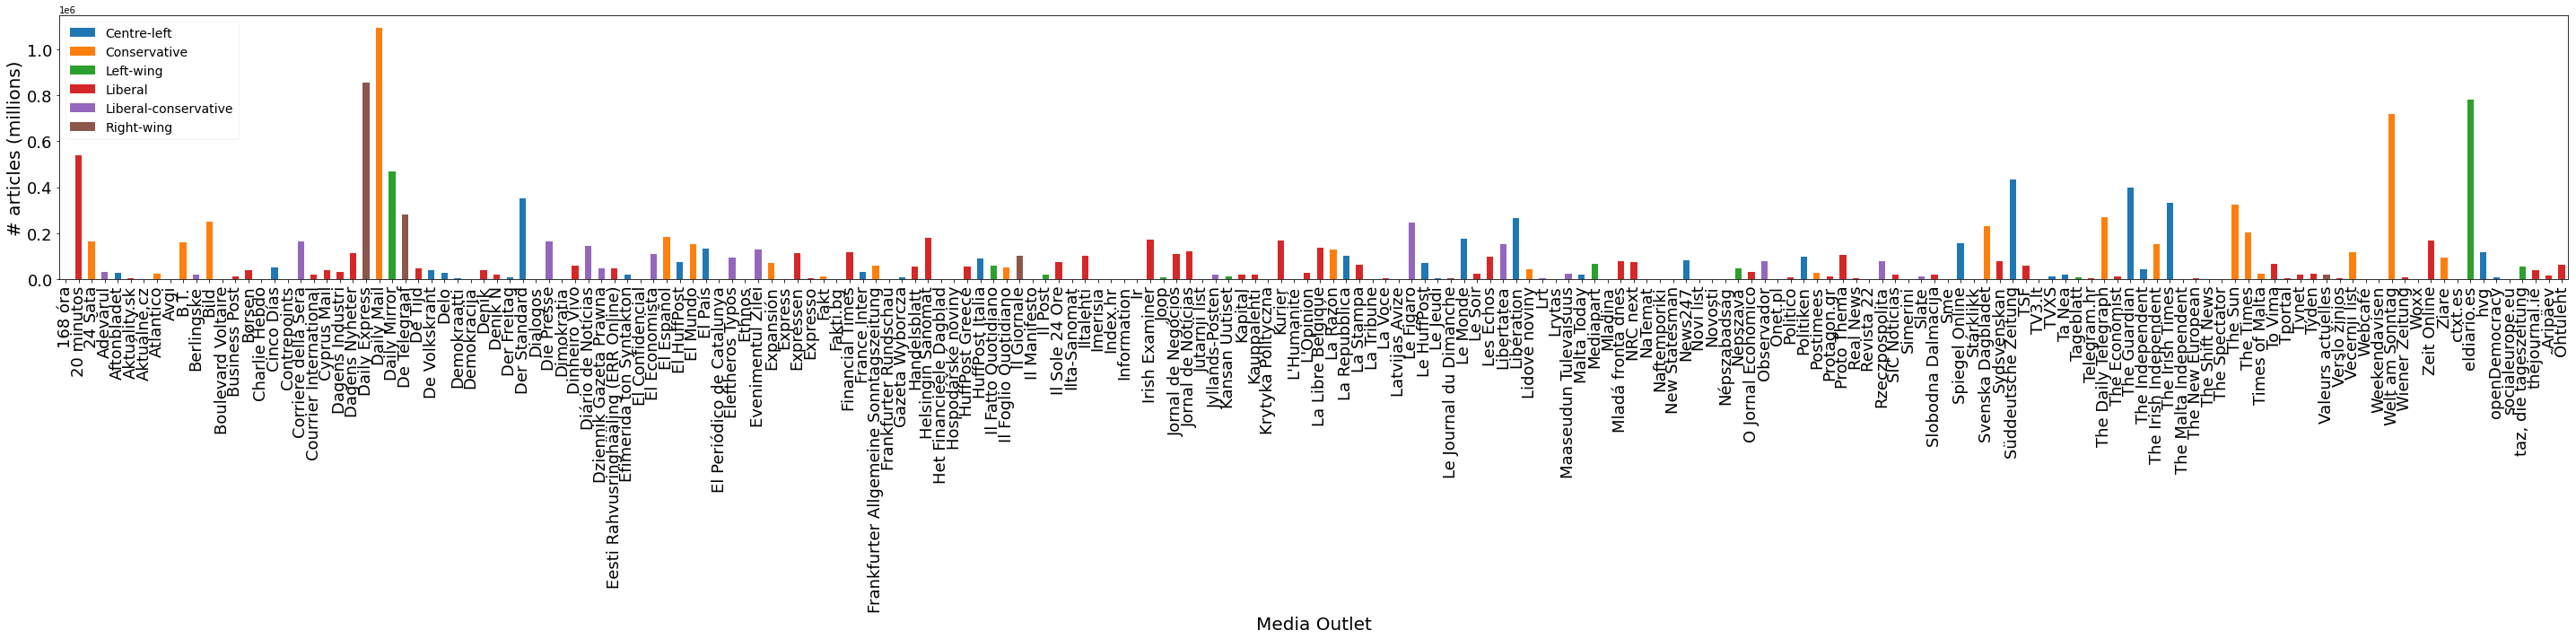

In [16]:
plot_domain_articles_distribution(all_data)

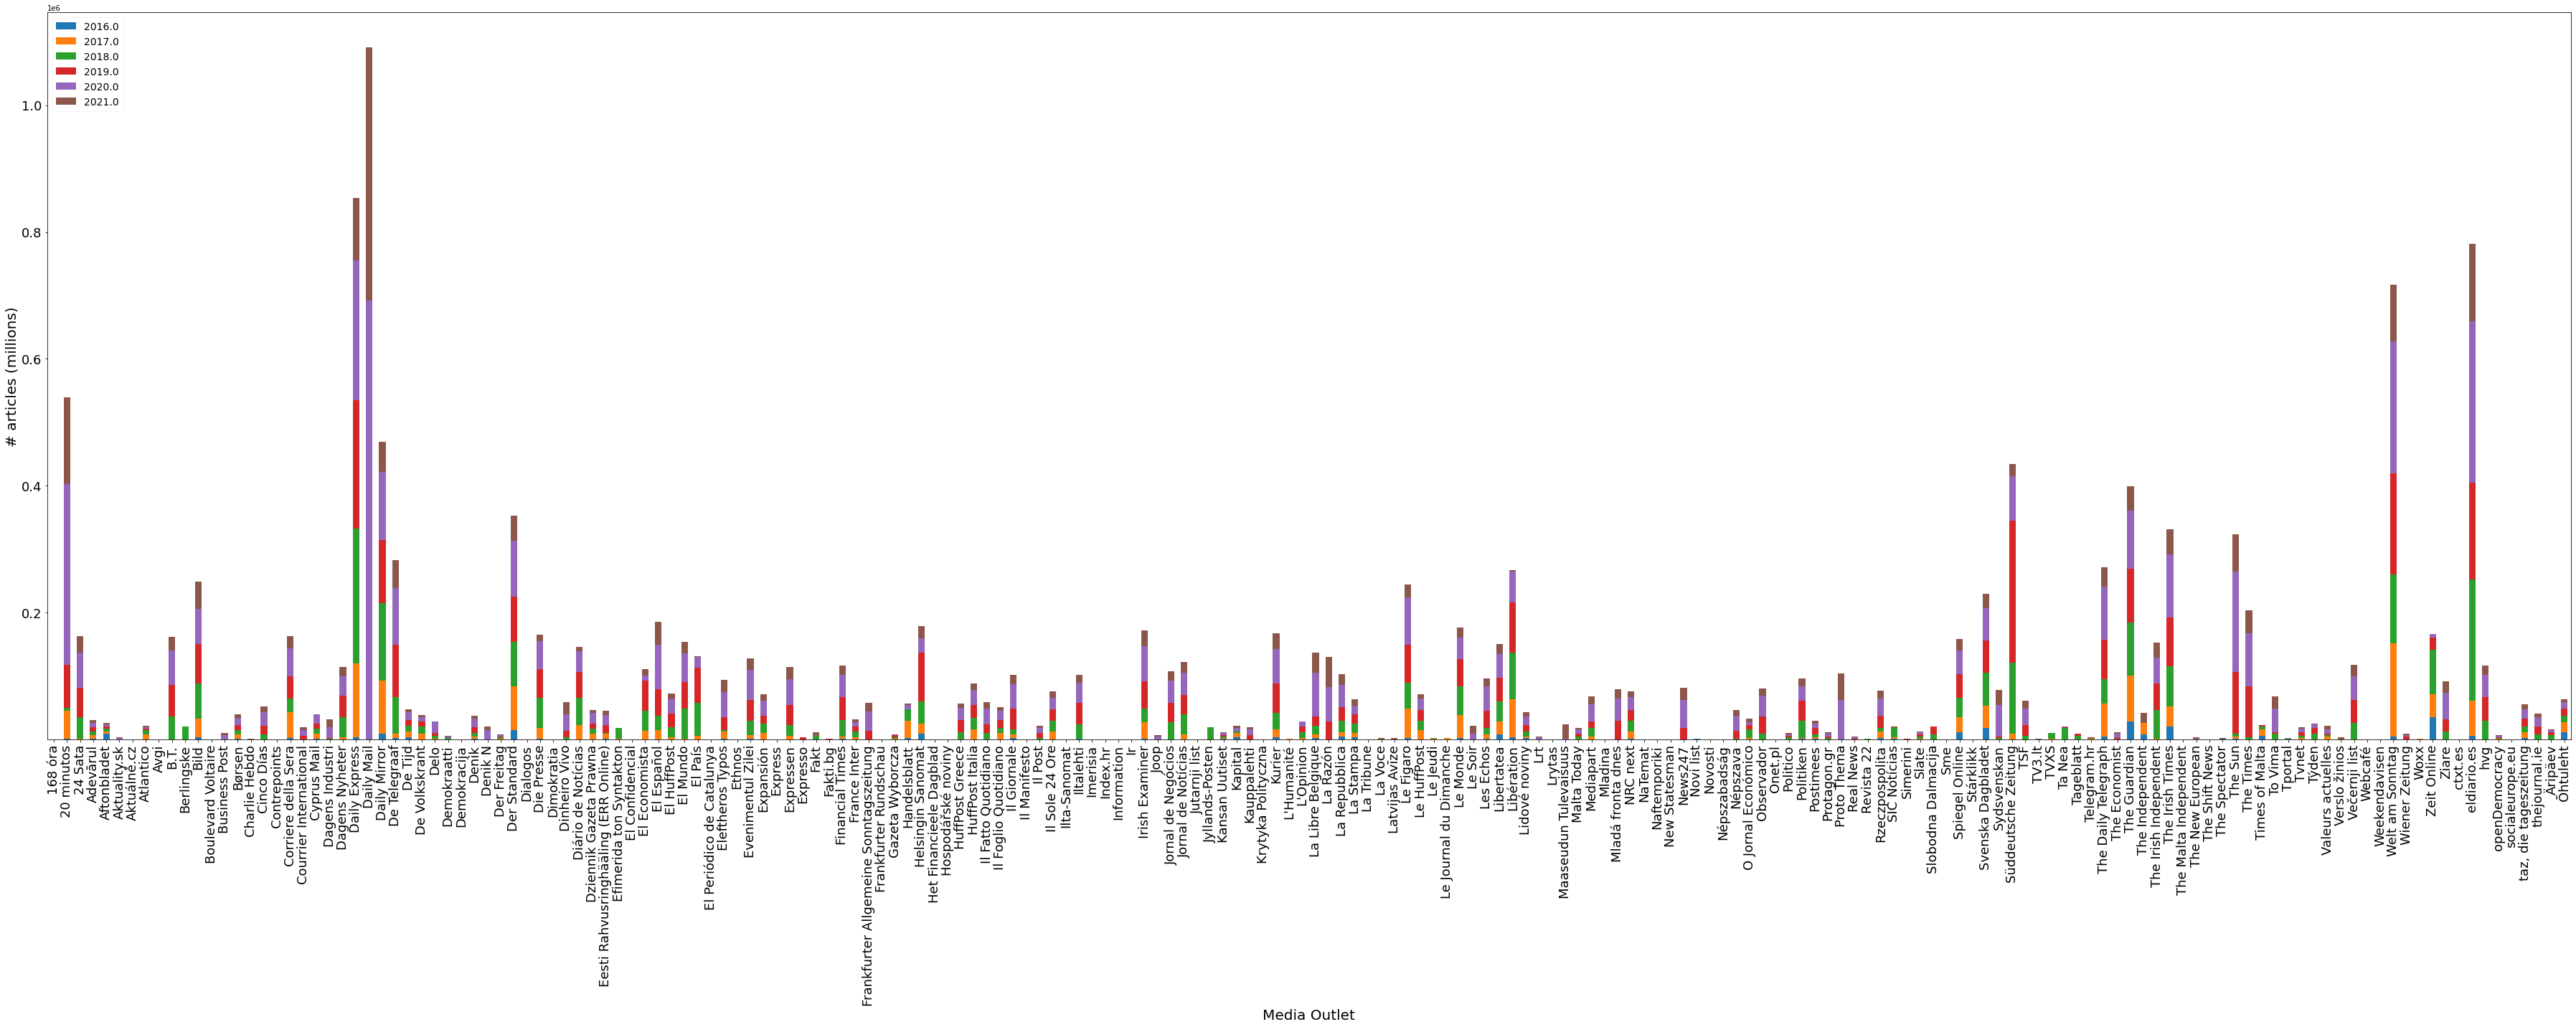

In [17]:
plot_domain_articles_year_distribution(all_data)

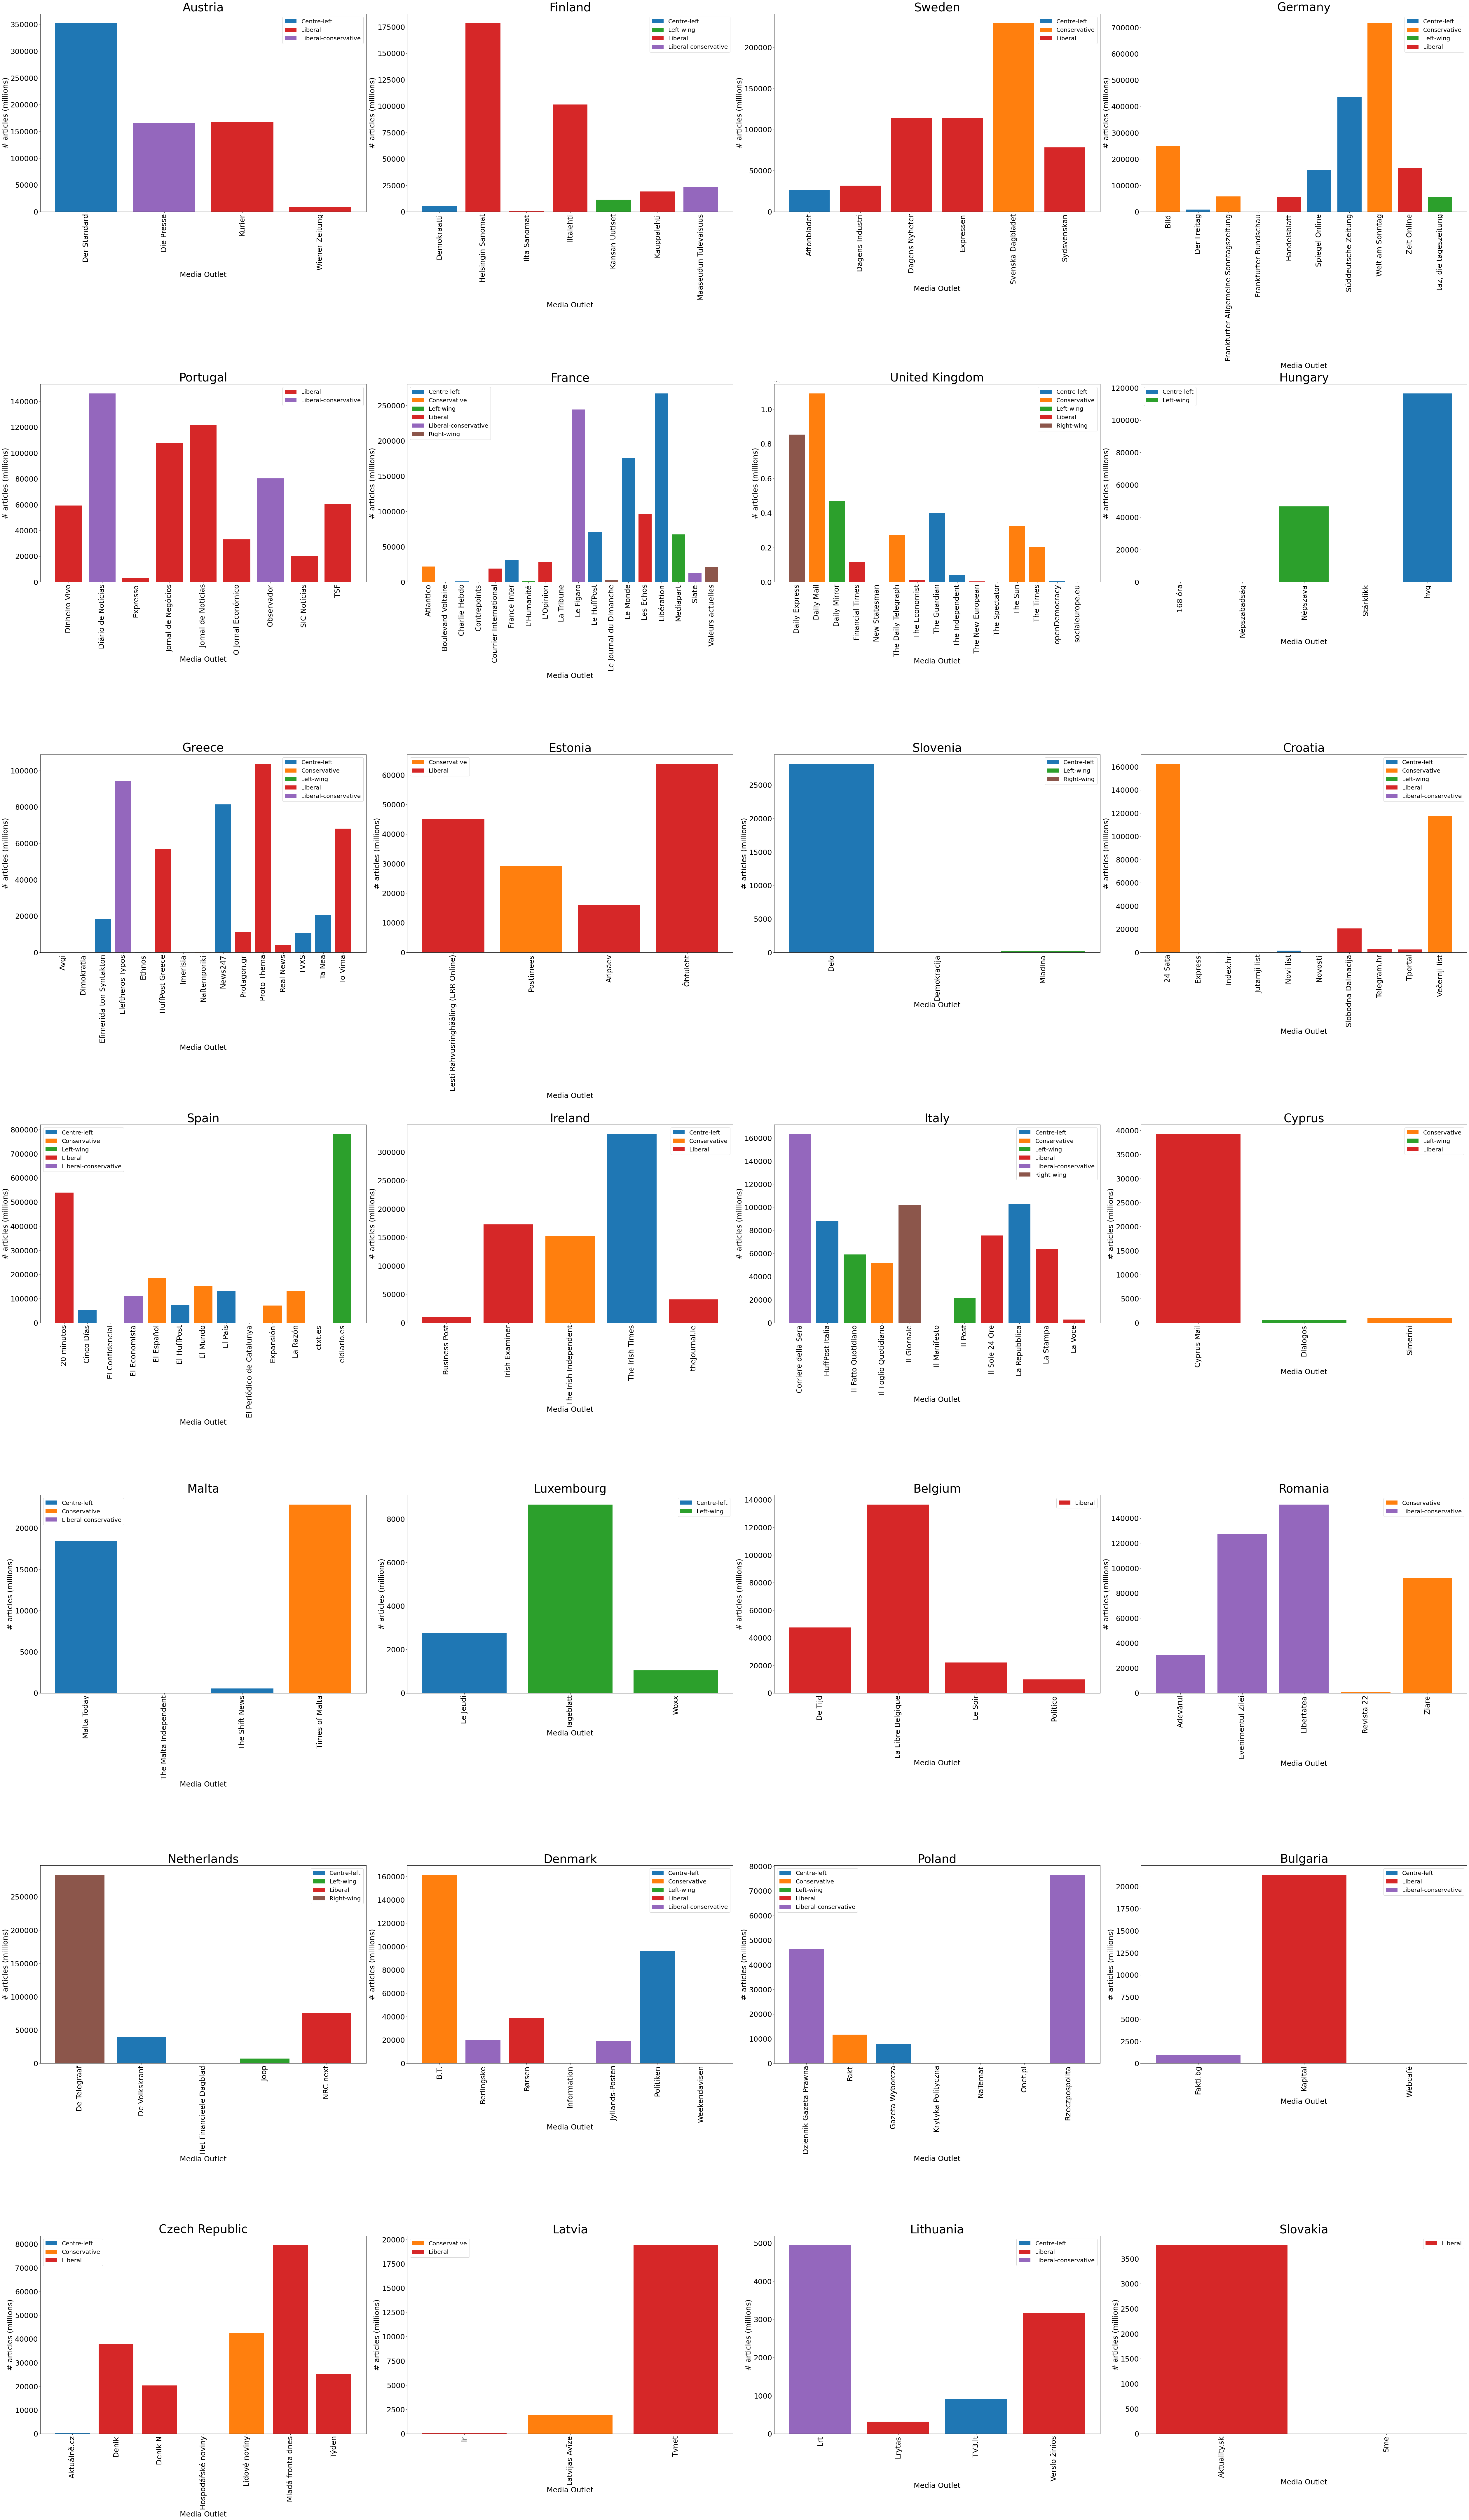

In [18]:
plot_country_media_sources(all_data)

In [19]:
pd. set_option('display.max_rows', None) 

In [20]:
grouped = all_data.groupby(by=["political_leaning","country","source_name"]).count()
grouped

title  \
political_leaning    country        source_name                                       
Centre-left          Austria        Der Standard                             352280   
                     Bulgaria       Webcafé                                       1   
                     Croatia        Index.hr                                    302   
                                    Novi list                                  1474   
                     Czech Republic Aktuálně.cz                                 372   
                     Denmark        Politiken                                 95946   
                     Finland        Demokraatti                                5436   
                     France         Charlie Hebdo                               946   
                                    France Inter                              31348   
                                    Le HuffPost                               71259   
                                    Le Monde                                 175903   
                                    Libération                               267115   
                     Germany        Der Freitag                                8192   
                                    Frankfurter Rundschau                       460   
                                    Spiegel Online                           158112   
                                    Süddeutsche Zeitung                      434515   
                     Greece         Efimerida ton Syntakton                   18248   
                                    Ethnos                                      235   
                                    News247                                   81325   
                                    TVXS                                      10675   
                                    Ta Nea                                    20748   
                     Hungary        168 óra                                     163   
                                    Népszabadság                                 31   
                                    Stárklikk                                   157   
                                    hvg                                      116515   
                     Ireland        The Irish Times                          331352   
                     Italy          HuffPost Italia                           88245   
                                    La Repubblica                            102972   
                     Lithuania      TV3.lt                                      905   
                     Luxembourg     Le Jeudi                                   2761   
                     Malta          Malta Today                               18409   
                                    The Shift News                              547   
                     Netherlands    De Volkskrant                             39016   
                     Poland         Gazeta Wyborcza                            7724   
                                    Onet.pl                                       1   
                     Slovenia       Delo                                      28166   
                     Spain          Cinco Días                                52311   
                                    El HuffPost                               72637   
                                    El País                                  131347   
                                    El Periódico de Catalunya                    14   
                                    ctxt.es                                     102   
                     Sweden         Aftonbladet                               26353   
                     United Kingdom The Guardian                             399511   
                                    The Independent                           41993   
                                    openDemocracy                           

In [125]:
# selected media for test no bias (they will not be included in the training set)
Centre_Left = ['Malta Today', 'France Inter', 'Der Freitag', 'TVXS', 'openDemocracy']
Conservative = ['Frankfurter Allgemeine Sonntagszeitung', 'Expansión' ,'The Spectator', 'The Irish Independent', 'Večernji list']
Left_Wing =  ["L'Humanité", 'Il Post', 'Tageblatt']
Liberal = ['Politico', 'Telegram.hr', 'Courrier International', 'Business Post','La Voce']
Liberal_Conservative = ['Jyllands-Posten', 'Evenimentul Zilei', 'Slate', 'Dziennik Gazeta Prawna', 'Observador']
Right_Wing =  ['Le Journal du Dimanche', 'Il Giornale', 'De Telegraaf']
# creating a unique list
selected_media = list(set(Centre_Left + Conservative + Left_Wing + Liberal + Liberal_Conservative + Right_Wing))
print('# media selected for the test no bias', len(selected_media))

# media selected for the test no bias 26


### Defining test no bias 
- balancing between classes (7500 for four class, 4500 for two classes (right wing, left wing) because they contain too few media sources)
- 5 media for each class (5 media for four classes, 3 for wo classes (right wing, left wing) that contain too few media sources)
- try to capture different countries

In [126]:
# selecting all articles and creating the test no bias
test_no_bias_all = all_data.loc[all_data.source_name.isin(selected_media)]
print('# articles in test no bias not balanced', len(test_no_bias_all))
test_no_bias_all.to_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_no_bias_all_cleaned.csv', index=False) # TODO: devo pulire

# articles in test no bias not balanced 1225401


In [127]:
test_no_bias_all.source_name.value_counts()

De Telegraaf                              282938
The Irish Independent                     152268
Evenimentul Zilei                         127318
Večernji list                             117718
Il Giornale                               102105
Observador                                 80203
Expansión                                  71058
Frankfurter Allgemeine Sonntagszeitung     57842
Dziennik Gazeta Prawna                     46516
France Inter                               31348
Il Post                                    21368
Jyllands-Posten                            18992
Courrier International                     18970
Malta Today                                18409
Slate                                      12290
TVXS                                       10675
Business Post                              10089
Politico                                    9788
Tageblatt                                   8664
Der Freitag                                 8192
openDemocracy       

In [128]:
test_no_bias_all.year.value_counts()

2020.0    406244
2019.0    325487
2018.0    252678
2021.0    180616
2017.0     50460
2016.0      9916
Name: year, dtype: int64

In [129]:
# balancing test set no bias (1500 articles for source)
test_no_bias_balanced = test_no_bias_all.groupby('source_name', group_keys=False).apply(lambda x: x.sample(1500))
print('# articles in test no bias balanced', len(test_no_bias_balanced))
test_no_bias_balanced.to_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_no_bias_balanced_cleaned.csv', index=False)

# articles in test no bias balanced 39000


In [130]:
test_no_bias_balanced.country.value_counts()

France            7500
Italy             4500
Ireland           3000
Germany           3000
Croatia           3000
United Kingdom    3000
Netherlands       1500
Poland            1500
Romania           1500
Spain             1500
Denmark           1500
Malta             1500
Portugal          1500
Belgium           1500
Greece            1500
Luxembourg        1500
Name: country, dtype: int64

In [131]:
test_no_bias_balanced.year.value_counts()

2020.0    10106
2018.0     9753
2019.0     8305
2017.0     4970
2021.0     4451
2016.0     1415
Name: year, dtype: int64

In [132]:
test_no_bias_balanced.political_leaning.value_counts()

Liberal                 7500
Centre-left             7500
Liberal-conservative    7500
Conservative            7500
Right-wing              4500
Left-wing               4500
Name: political_leaning, dtype: int64

In [133]:
grouped = test_no_bias_balanced.groupby(by=["political_leaning","country","source_name"]).count()
grouped

title  \
political_leaning    country        source_name                                     
Centre-left          France         France Inter                             1500   
                     Germany        Der Freitag                              1500   
                     Greece         TVXS                                     1500   
                     Malta          Malta Today                              1500   
                     United Kingdom openDemocracy                            1500   
Conservative         Croatia        Večernji list                            1500   
                     Germany        Frankfurter Allgemeine Sonntagszeitung   1500   
                     Ireland        The Irish Independent                    1500   
                     Spain          Expansión                                1500   
                     United Kingdom The Spectator                            1500   
Left-wing            France         L'Humanité                               1500   
                     Italy          Il Post                                  1500   
                     Luxembourg     Tageblatt                                1500   
Liberal              Belgium        Politico                                 1500   
                     Croatia        Telegram.hr                              1500   
                     France         Courrier International                   1500   
                     Ireland        Business Post                            1500   
                     Italy          La Voce                                  1500   
Liberal-conservative Denmark        Jyllands-Posten                          1500   
                     France         Slate                                    1500   
                     Poland         Dziennik Gazeta Prawna                   1500   
                     Portugal       Observador                               1500   
                     Romania        Evenimentul Zilei                        1500   
Right-wing           France         Le Journal du Dimanche                   1500   
                     Italy          Il Giornale                              1500   
                     Netherlands    De Telegraaf                             1500   

                                                                            maintext  \
political_leaning    country        source_name                                        
Centre-left          France         France Inter                                1500   
                     Germany        Der Freitag                                 1500   
                     Greece         TVXS                                        1500   
                     Malta          Malta Today                                 1500   
                     United Kingdom openDemocracy                               1500   
Conservative         Croatia        Večernji list                               1500   
                     Germany        Frankfurter Allgemeine Sonntagszeitung      1500   
                     Ireland        The Irish Independent                       1500   
                     Spain          Expansión                                   1500   
                     United Kingdom The Spectator                               1500   
Left-wing            France         L'Humanité                                  1500   
                     Italy          Il Post                                     1500   
                     Luxembourg     Tageblatt                                   1500   
Liberal              Belgium        Politico                                    1500   
                     Croatia        Telegram.hr                                 1500   
                     France         Courrier International                      1500   
                     Ireland        Business Post                               1500   
                     It

### Defining training set

In [134]:
# TODO: mandare da qua
training_set_all = all_data.loc[~all_data.source_name.isin(selected_media)]  # removing media used for test no bias
print('# articles in training set all', len(training_set_all))
print('# media in training set all', training_set_all.source_name.nunique())
print('# country in training set all', training_set_all.country.nunique())
print('# year in training set all', training_set_all.year.nunique())


# articles in training set all 14440394
# media in training set all 166
# country in training set all 28
# year in training set all 6


In [135]:
#training_balanced = training_set_all.groupby(["political_leaning","language"], group_keys=False).apply(lambda x: x.sample(len(x)) if len(x) <= 50000 else x.sample(50000))
#print('# articles in training', len(training_balanced))

In [118]:
training_balanced = training_set_all.groupby("political_leaning", group_keys=False).apply(lambda x: x.sample(200000))
training_balanced.to_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/training_punt_cleaned.csv', index=False)

In [119]:
training_balanced.language.value_counts()

en    438765
es    191023
de    158228
fr    103790
it     52626
pt     46442
el     36747
sv     31917
ro     29001
fi     22244
da     19226
hu     13770
pl     13588
nl     10420
cs      9780
hr      9213
et      7929
sl      1498
bg      1356
lv      1164
lt       634
ru       281
sk       207
ca       150
tr         1
Name: language, dtype: int64

In [120]:
training_balanced.year.value_counts()

2020.0    363894
2019.0    273786
2018.0    235996
2021.0    170340
2017.0    135540
2016.0     20444
Name: year, dtype: int64

In [121]:
training_balanced.country.nunique()

28

In [122]:
training_balanced.source_name.value_counts()

Daily Express                           195253
eldiario.es                             104251
Daily Mirror                             62722
Daily Mail                               52495
Le Figaro                                39789
Welt am Sonntag                          34639
20 minutos                               30325
Süddeutsche Zeitung                      27967
Die Presse                               26720
Corriere della Sera                      26468
The Guardian                             25111
Libertatea                               24606
Diário de Notícias                       23583
Der Standard                             22542
The Irish Times                          21339
El Economista                            17944
Libération                               17259
The Sun                                  15539
Eleftheros Typos                         15400
The Daily Telegraph                      13030
Rzeczpospolita                           12503
Bild         

In [123]:
training_balanced.political_leaning.value_counts()

Centre-left             200000
Conservative            200000
Left-wing               200000
Liberal                 200000
Liberal-conservative    200000
Right-wing              200000
Name: political_leaning, dtype: int64

In [124]:
grouped = training_balanced.groupby(by=["political_leaning","country","source_name"]).count()
grouped

title  \
political_leaning    country        source_name                                    
Centre-left          Austria        Der Standard                           22542   
                     Croatia        Index.hr                                  14   
                                    Novi list                                 90   
                     Czech Republic Aktuálně.cz                               24   
                     Denmark        Politiken                               6036   
                     Finland        Demokraatti                              336   
                     France         Charlie Hebdo                             62   
                                    Le HuffPost                             4561   
                                    Le Monde                               11356   
                                    Libération                             17259   
                     Germany        Frankfurter Rundschau                     28   
                                    Spiegel Online                         10215   
                                    Süddeutsche Zeitung                    27967   
                     Greece         Efimerida ton Syntakton                 1109   
                                    Ethnos                                    11   
                                    News247                                 5193   
                                    Ta Nea                                  1341   
                     Hungary        168 óra                                    7   
                                    Népszabadság                               1   
                                    Stárklikk                                  8   
                                    hvg                                     7545   
                     Ireland        The Irish Times                        21339   
                     Italy          HuffPost Italia                         5570   
                                    La Repubblica                           6422   
                     Lithuania      TV3.lt                                    63   
                     Luxembourg     Le Jeudi                                 182   
                     Malta          The Shift News                            39   
                     Netherlands    De Volkskrant                           2520   
                     Poland         Gazeta Wyborcza                          501   
                     Slovenia       Delo                                    1793   
                     Spain          Cinco Días                              3308   
                                    El HuffPost                             4650   
                                    El País                                 8395   
                                    El Periódico de Catalunya                  3   
                                    ctxt.es                                    7   
                     Sweden         Aftonbladet                             1632   
                     United Kingdom The Guardian                           25111   
                                    The Independent                         2736   
                                    socialeurope.eu                           24   
Conservative         Croatia        24 Sata                                 7926   
                     Cyprus         Simerini                                  55   
                     Czech Republic Lidové noviny                           2104   
                     Denmark        B.T.                                    7673   
                     Estonia        Postimees                               1431   
                     France         Atlantico                               1026   
                     Germany        Bild                                   11875   
                                    Welt am

### Defining test set Bias

In [138]:
all_test = all_data.loc[~all_data.source_name.isin(selected_media)]  # removing media used for test no bias
index_training = training_balanced.id.to_list() # selecting articles used for training
all_test = all_test.loc[~all_test.id.isin(index_training)] # removing articles used for training
len(all_test)

13240394

In [139]:
all_test_balanced = all_test.groupby("political_leaning", group_keys=False).apply(lambda x: x.sample(75000))
all_test_balanced.to_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_bias_cleaned.csv', index=False)

In [140]:
all_test_balanced.political_leaning.value_counts()

Centre-left             75000
Conservative            75000
Left-wing               75000
Liberal                 75000
Liberal-conservative    75000
Right-wing              75000
Name: political_leaning, dtype: int64

In [141]:
grouped = all_test_balanced.groupby(by=["political_leaning","country","source_name"]).count()
grouped

title  \
political_leaning    country        source_name                                   
Centre-left          Austria        Der Standard                           8458   
                     Croatia        Index.hr                                 11   
                                    Novi list                                35   
                     Czech Republic Aktuálně.cz                               5   
                     Denmark        Politiken                              2330   
                     Finland        Demokraatti                             125   
                     France         Charlie Hebdo                            18   
                                    Le HuffPost                            1688   
                                    Le Monde                               4196   
                                    Libération                             6349   
                     Germany        Frankfurter Rundschau                    12   
                                    Spiegel Online                         3835   
                                    Süddeutsche Zeitung                   10561   
                     Greece         Efimerida ton Syntakton                 443   
                                    Ethnos                                    7   
                                    News247                                1960   
                                    Ta Nea                                  497   
                     Hungary        168 óra                                   4   
                                    Népszabadság                              2   
                                    Stárklikk                                 7   
                                    hvg                                    2747   
                     Ireland        The Irish Times                        7971   
                     Italy          HuffPost Italia                        2110   
                                    La Repubblica                          2564   
                     Lithuania      TV3.lt                                   18   
                     Luxembourg     Le Jeudi                                 63   
                     Malta          The Shift News                           14   
                     Netherlands    De Volkskrant                           899   
                     Poland         Gazeta Wyborcza                         180   
                     Slovenia       Delo                                    669   
                     Spain          Cinco Días                             1272   
                                    El HuffPost                            1756   
                                    El País                                3171   
                                    ctxt.es                                   3   
                     Sweden         Aftonbladet                             679   
                     United Kingdom The Guardian                           9360   
                                    The Independent                         967   
                                    socialeurope.eu                          14   
Conservative         Croatia        24 Sata                                2880   
                     Cyprus         Simerini                                 11   
                     Czech Republic Lidové noviny                           775   
                     Denmark        B.T.                                   2944   
                     Estonia        Postimees                               531   
                     France         Atlantico                               407   
                     Germany        Bild                                   4549   
                                    Welt am Sonntag                       12872   
                     Greece         Naftemporiki                              6   
       

### Dataset without punt (training, test bias, test not biased)

In [ ]:
def get_no_punt_data(path_df,type):
    df = pd.read_csv(path_df)
    df['maintext'] = df["maintext"].str.replace('[^\w\s]','')
    df.to_csv(f'/homenfs/l.bellomo1/new_attempt_classifier/datasets/{type}_cleaned_nopunt.csv', index=False)

get_no_punt_data('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/training_punt_cleaned.csv','training')
get_no_punt_data('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_no_bias_balanced_cleaned.csv','test_no_bias_balanced')
get_no_punt_data('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/training_punt_cleaned.csv','test_bias')

## Eurotopics Datasets with topic information 

The goal of this operation is to annotate ech article with its topic. To do so, we have extracted the url of each articles because they often contain the topic information (e.g., politic, sport, cinema..).
- add the url link as a column to each created dataset (all_data_eu, all_data_eu_cleaned) based on the mapping with the id column
- extract the topic from the link and annotate the dataset with the topic column
- plot distribution based on the topic informations (e.g., what topic prevail? in whic country?)
- create the training and test set accordingly to topic information (e.g., training only composed of political articles then create different test set)


In [2]:
# open all eu dataset cleaned
all_data = pd.read_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/all_data_eu_cleaned.csv') 
ids = all_data.id.to_list()
print(len(ids))
print(len(set(ids)))

15665795
15665795


In [3]:
# open dict id:article_url
f = open('/homenfs/l.bellomo1/datasets/EU_mappings/id_url_dict.json',)
id_url_dict = json.load(f)
print(len(id_url_dict))

4505462


In [4]:
# mapping url to id in the df 
all_data["article_url"] = all_data["id"].map(id_url_dict)

In [5]:
all_data.head()

title  \
0  Vonn meldet sich in Lake Louise per Skype-Anru...   
1  Baustelle Pilgramgasse: Die Neuordnung des Wie...   
2  Nachrichten-Überblick: Die wichtigsten Themen ...   
3      Der Fernsehwahlkampf der Emotionen ist vorbei   
4  ÖVP wächst und liegt in Jois weiter auf dem er...   

                                            maintext         date_publish  \
0  "Positive Erklärung" In dieser möchte Vonn noc...  2018-11-29 17:23:30   
1  "Solche Arbeiten versuchen wir natürlich unter...  2019-02-15 04:00:00   
2  Guten Morgen... ... aus dem KURIER-Newsroom. W...  2019-05-23 05:26:10   
3  Die letzten Video-Lücken sind abgedichtet: Kle...  2019-09-27 14:55:55   
4  Die ÖVP hat in Jois ihren Spitzenplatz verteid...  2019-09-29 15:45:34   

  language  source_domain                                                 id  \
0       de  www.kurier.at  b3f9eabee4a065e5e46e486a8af905283ae7c0362d0cb3...   
1       de  www.kurier.at  aa41faf73c778b536e4f2593a37d7c25eaaf39c2878868...   
2       de  www.kurier.at  ac84b6032c2381adbab9963443f280cc62226ba9804ee8...   
3       de  www.kurier.at  2f209f932ecb28e8919125312577376e9b3a1458b19c92...   
4       de  www.kurier.at  318e314f9c0480ba9f1ed4e51987f784ebf294578fc13d...   

                  date    year source_name political_leaning  country  \
0  2018-11-29 17:23:30  2018.0      Kurier           Liberal  Austria   
1  2019-02-15 04:00:00  2019.0      Kurier           Liberal  Austria   
2  2019-05-23 05:26:10  2019.0      Kurier           Liberal  Austria   
3  2019-09-27 14:55:55  2019.0      Kurier           Liberal  Austria   
4  2019-09-29 15:45:34  2019.0      Kurier           Liberal  Austria   

  article_url  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [6]:
# most articles do not have a match with the url
all_data.isna().sum()

title                       0
maintext                    0
date_publish                0
language                    0
source_domain               0
id                          0
date                        0
year                        0
source_name                 0
political_leaning           0
country                     0
article_url          13057953
dtype: int64

In [24]:
all_data_with_topic = all_data.loc[all_data.article_url.notnull()]
all_data_with_topic
all_data_with_topic.to_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/all_data_eu_cleaned_topicurl.csv',index=False)

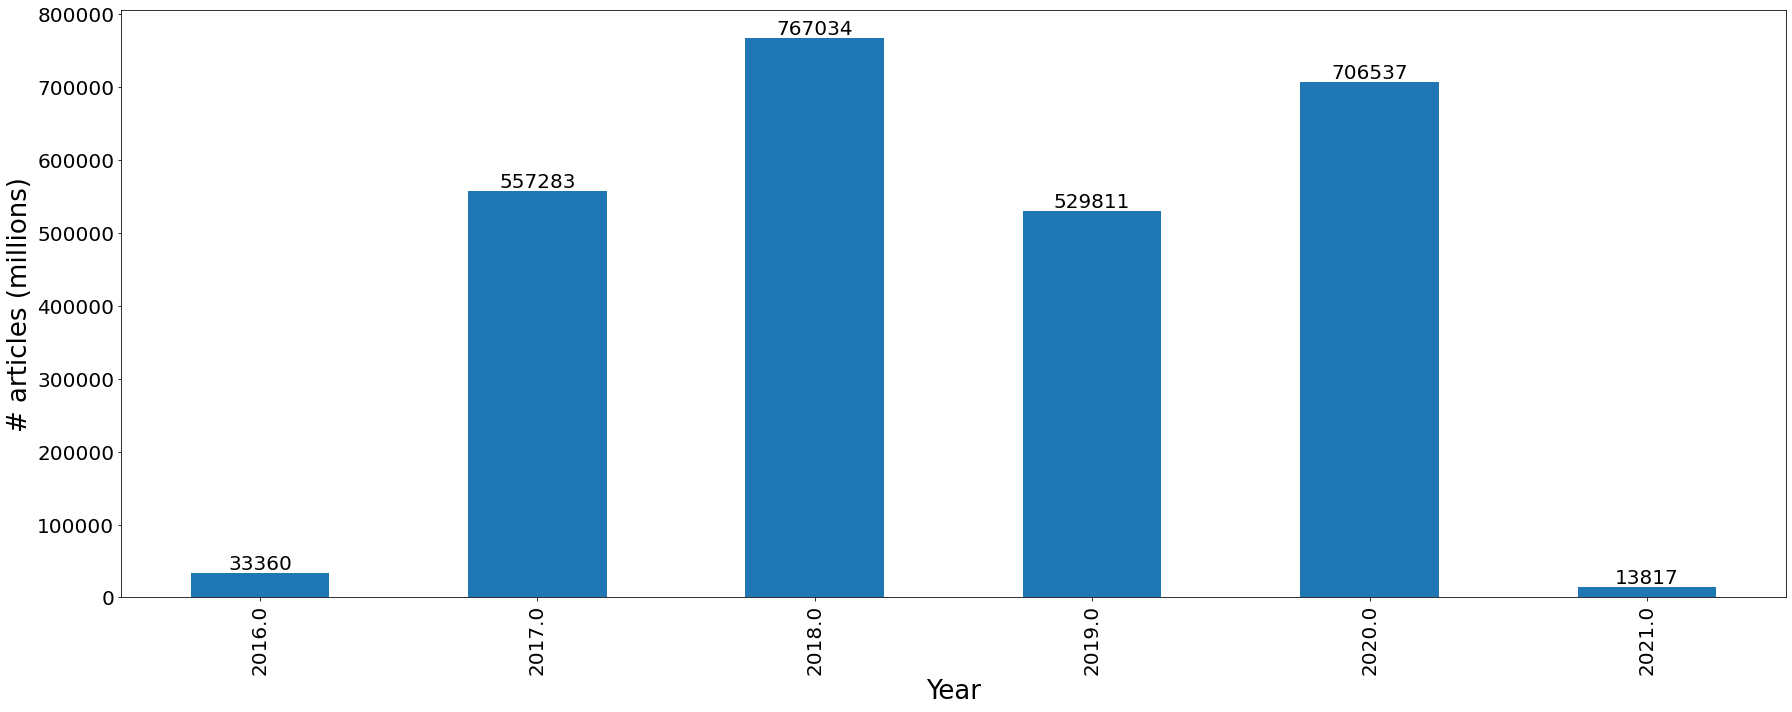

In [18]:
plot_year_distribution(all_data_with_topic)

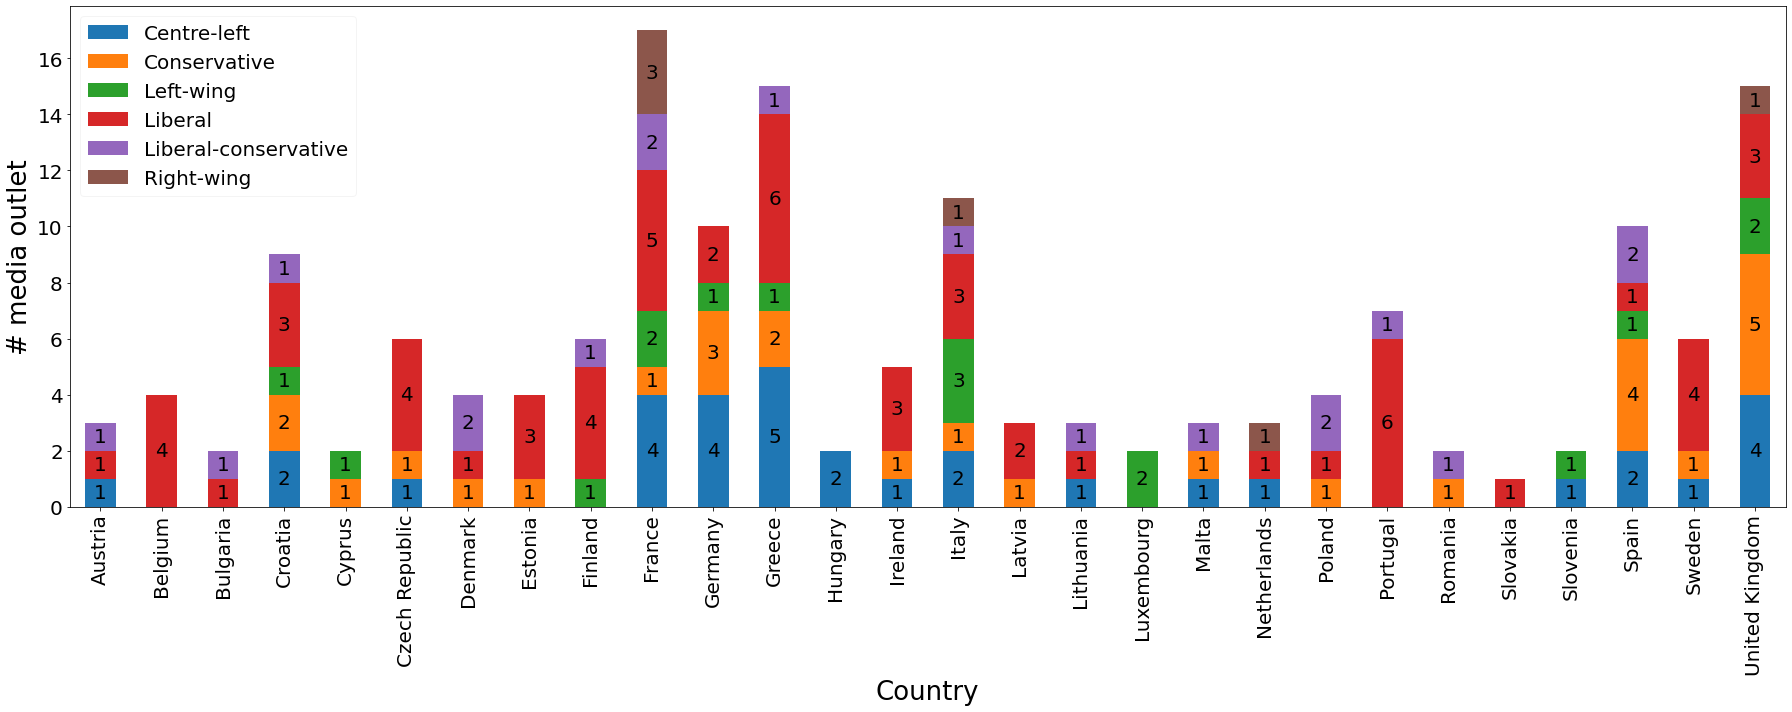

In [19]:
plot_country_media_distribution(all_data_with_topic)

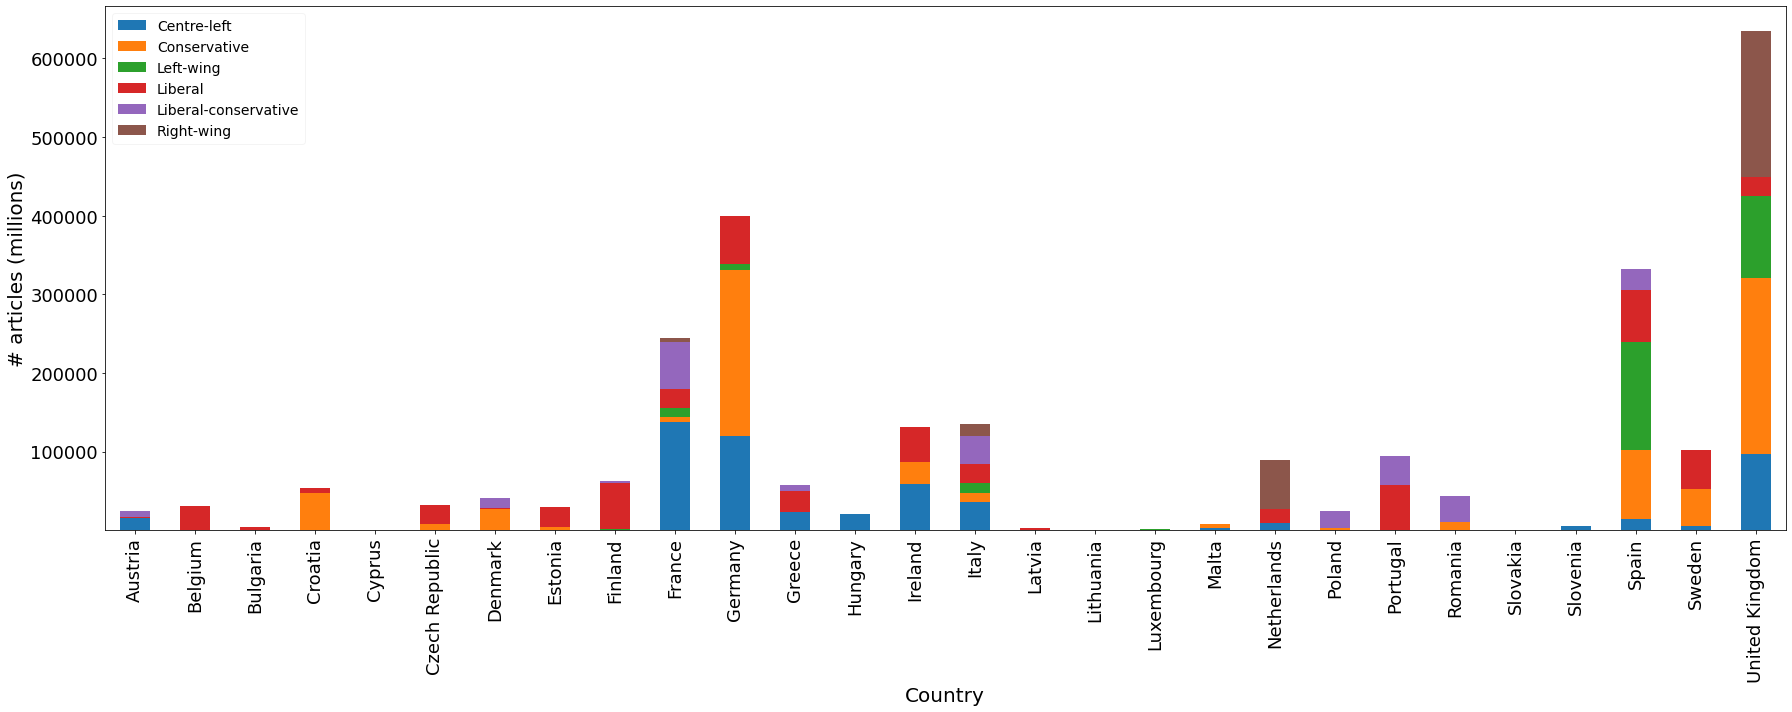

In [20]:
plot_country_articles_distribution(all_data_with_topic)

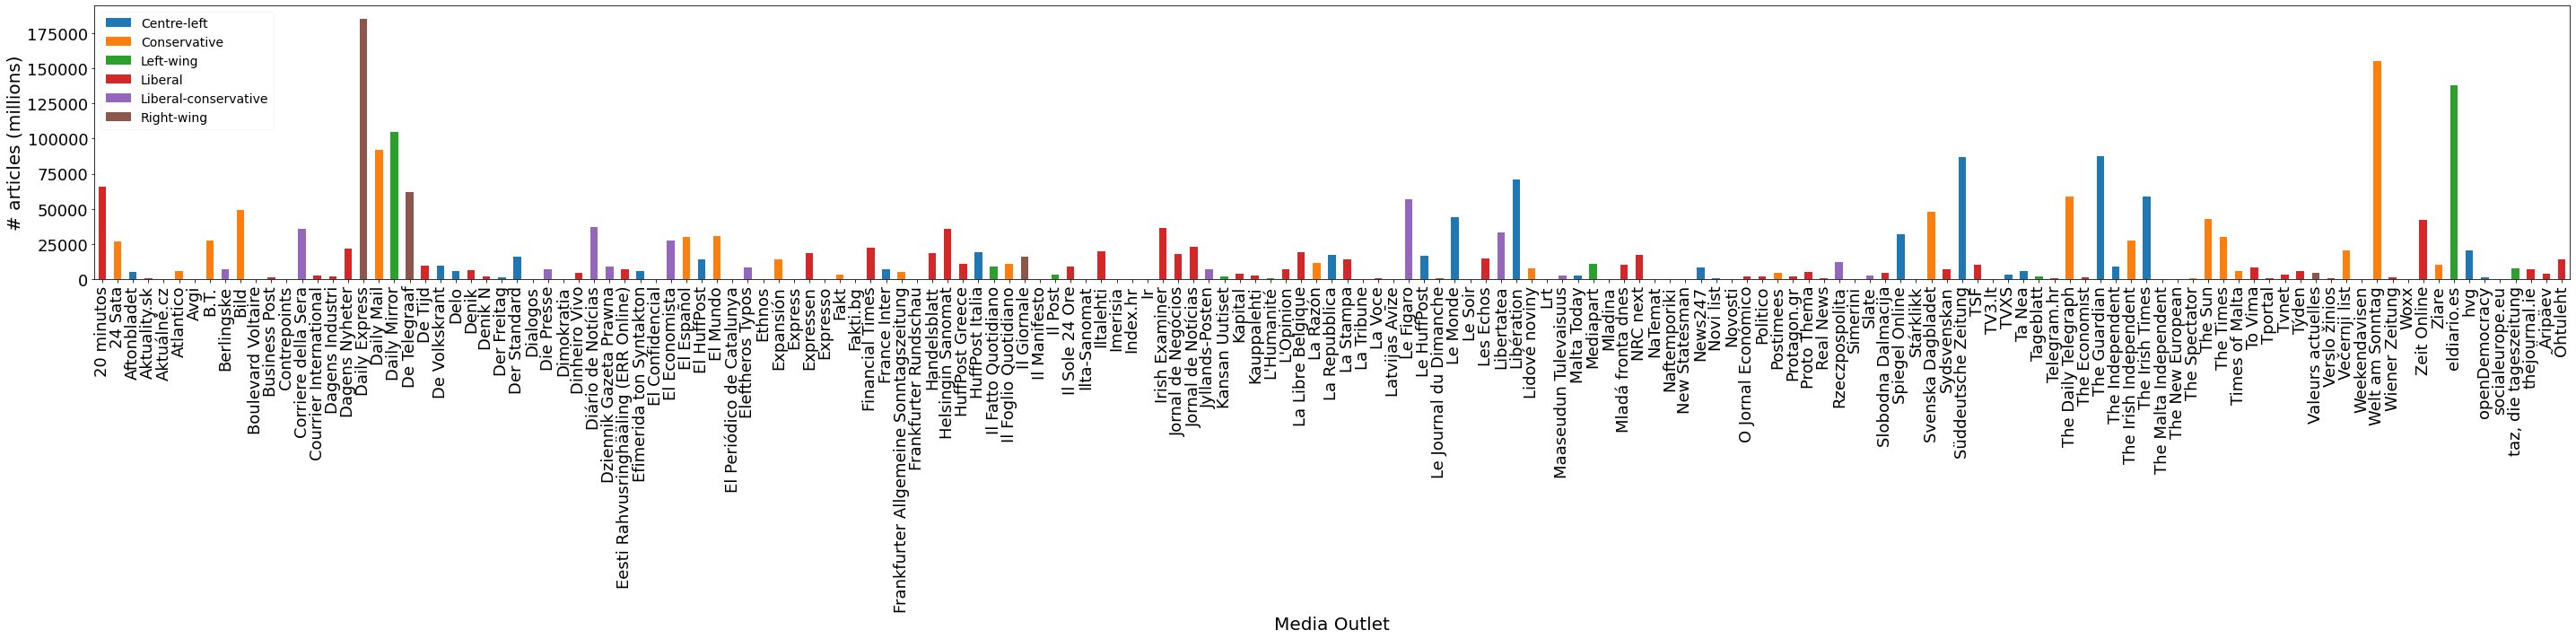

In [21]:
plot_domain_articles_distribution(all_data_with_topic)

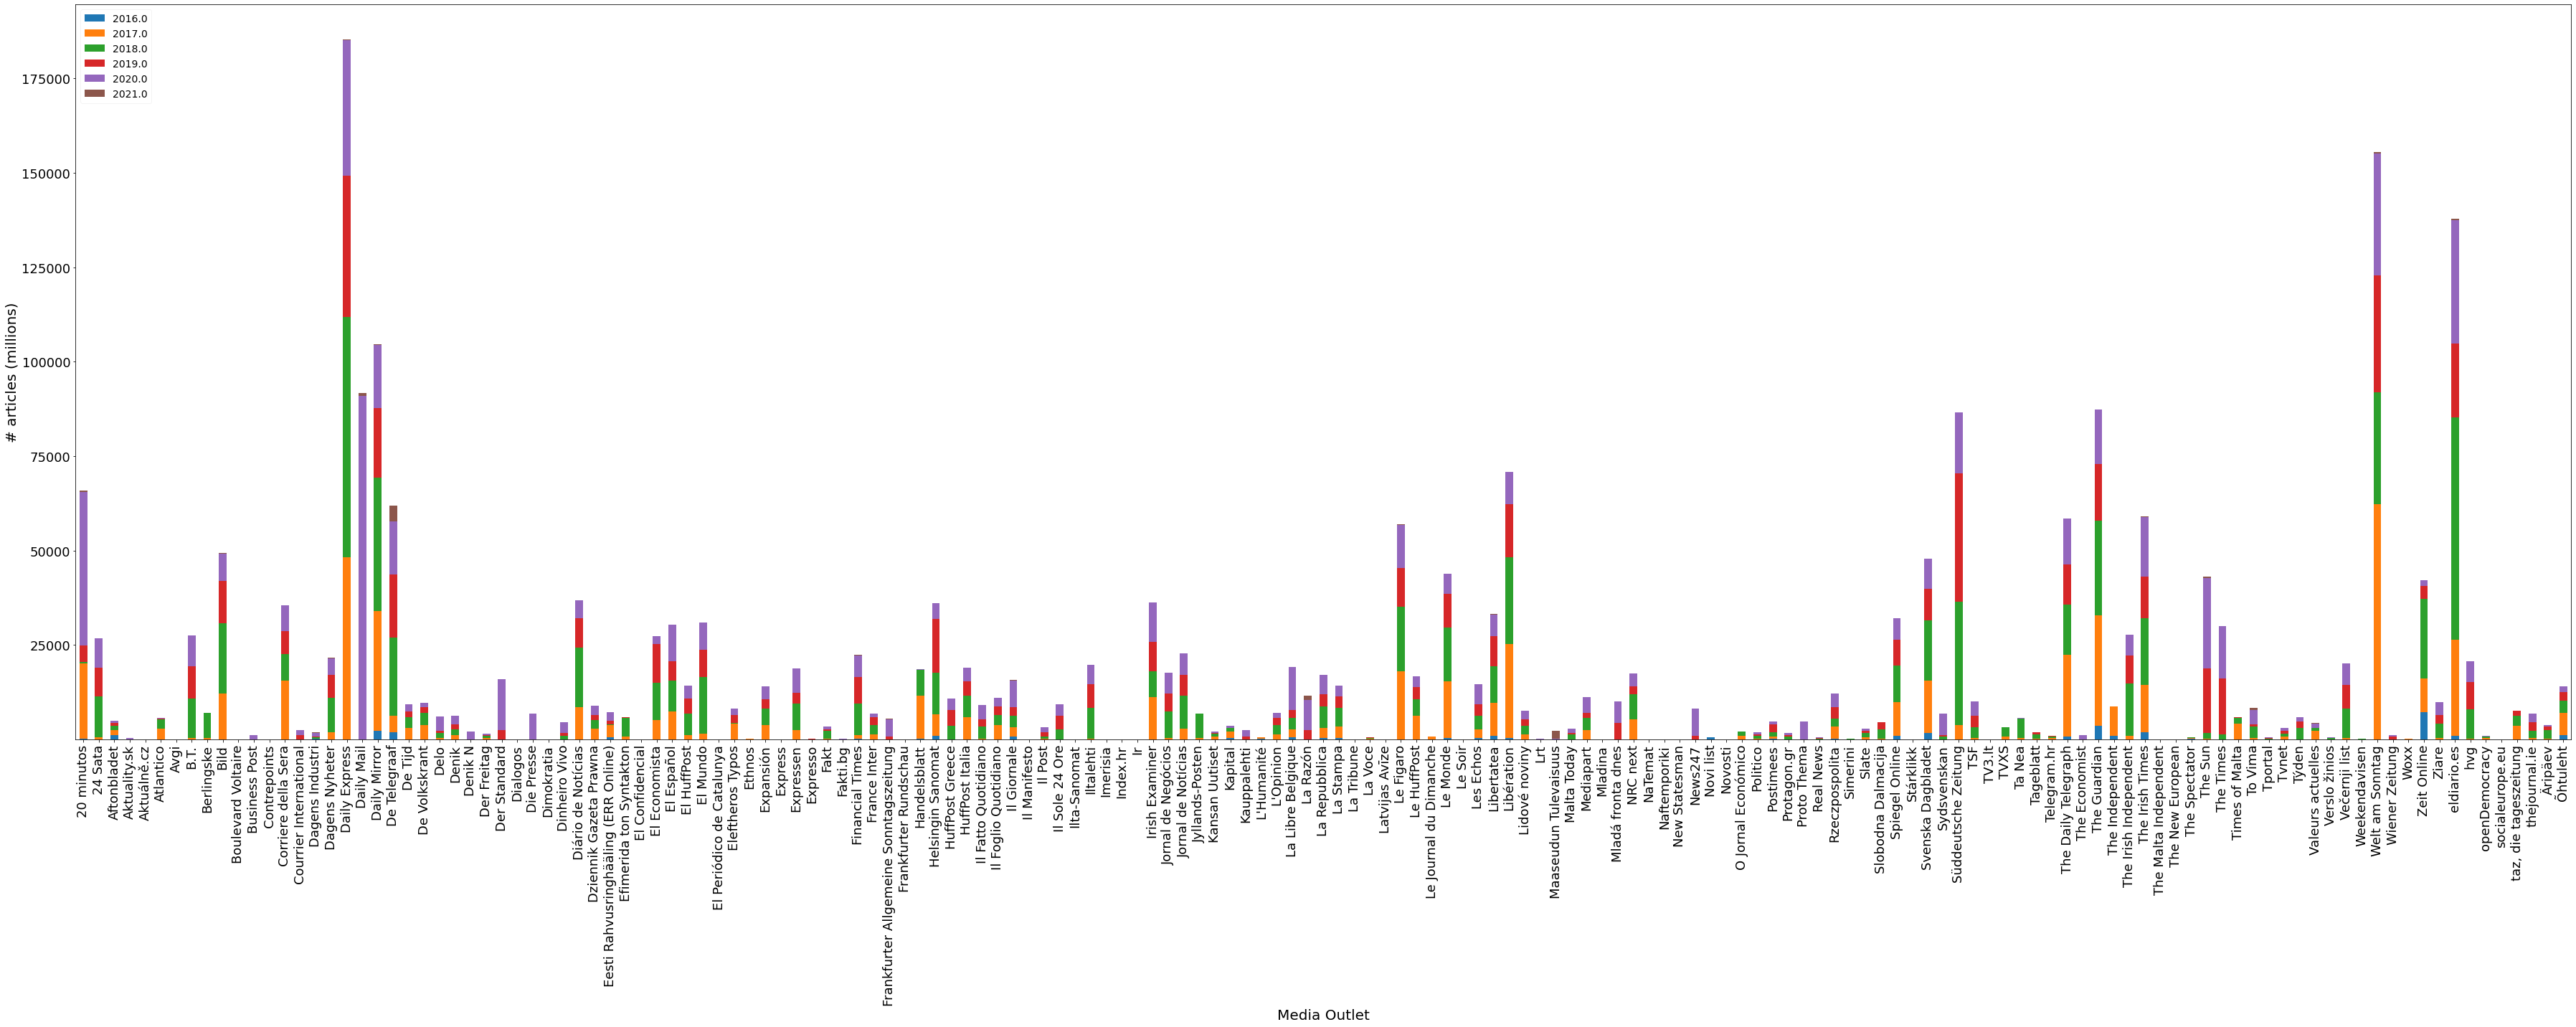

In [22]:
plot_domain_articles_year_distribution(all_data_with_topic)

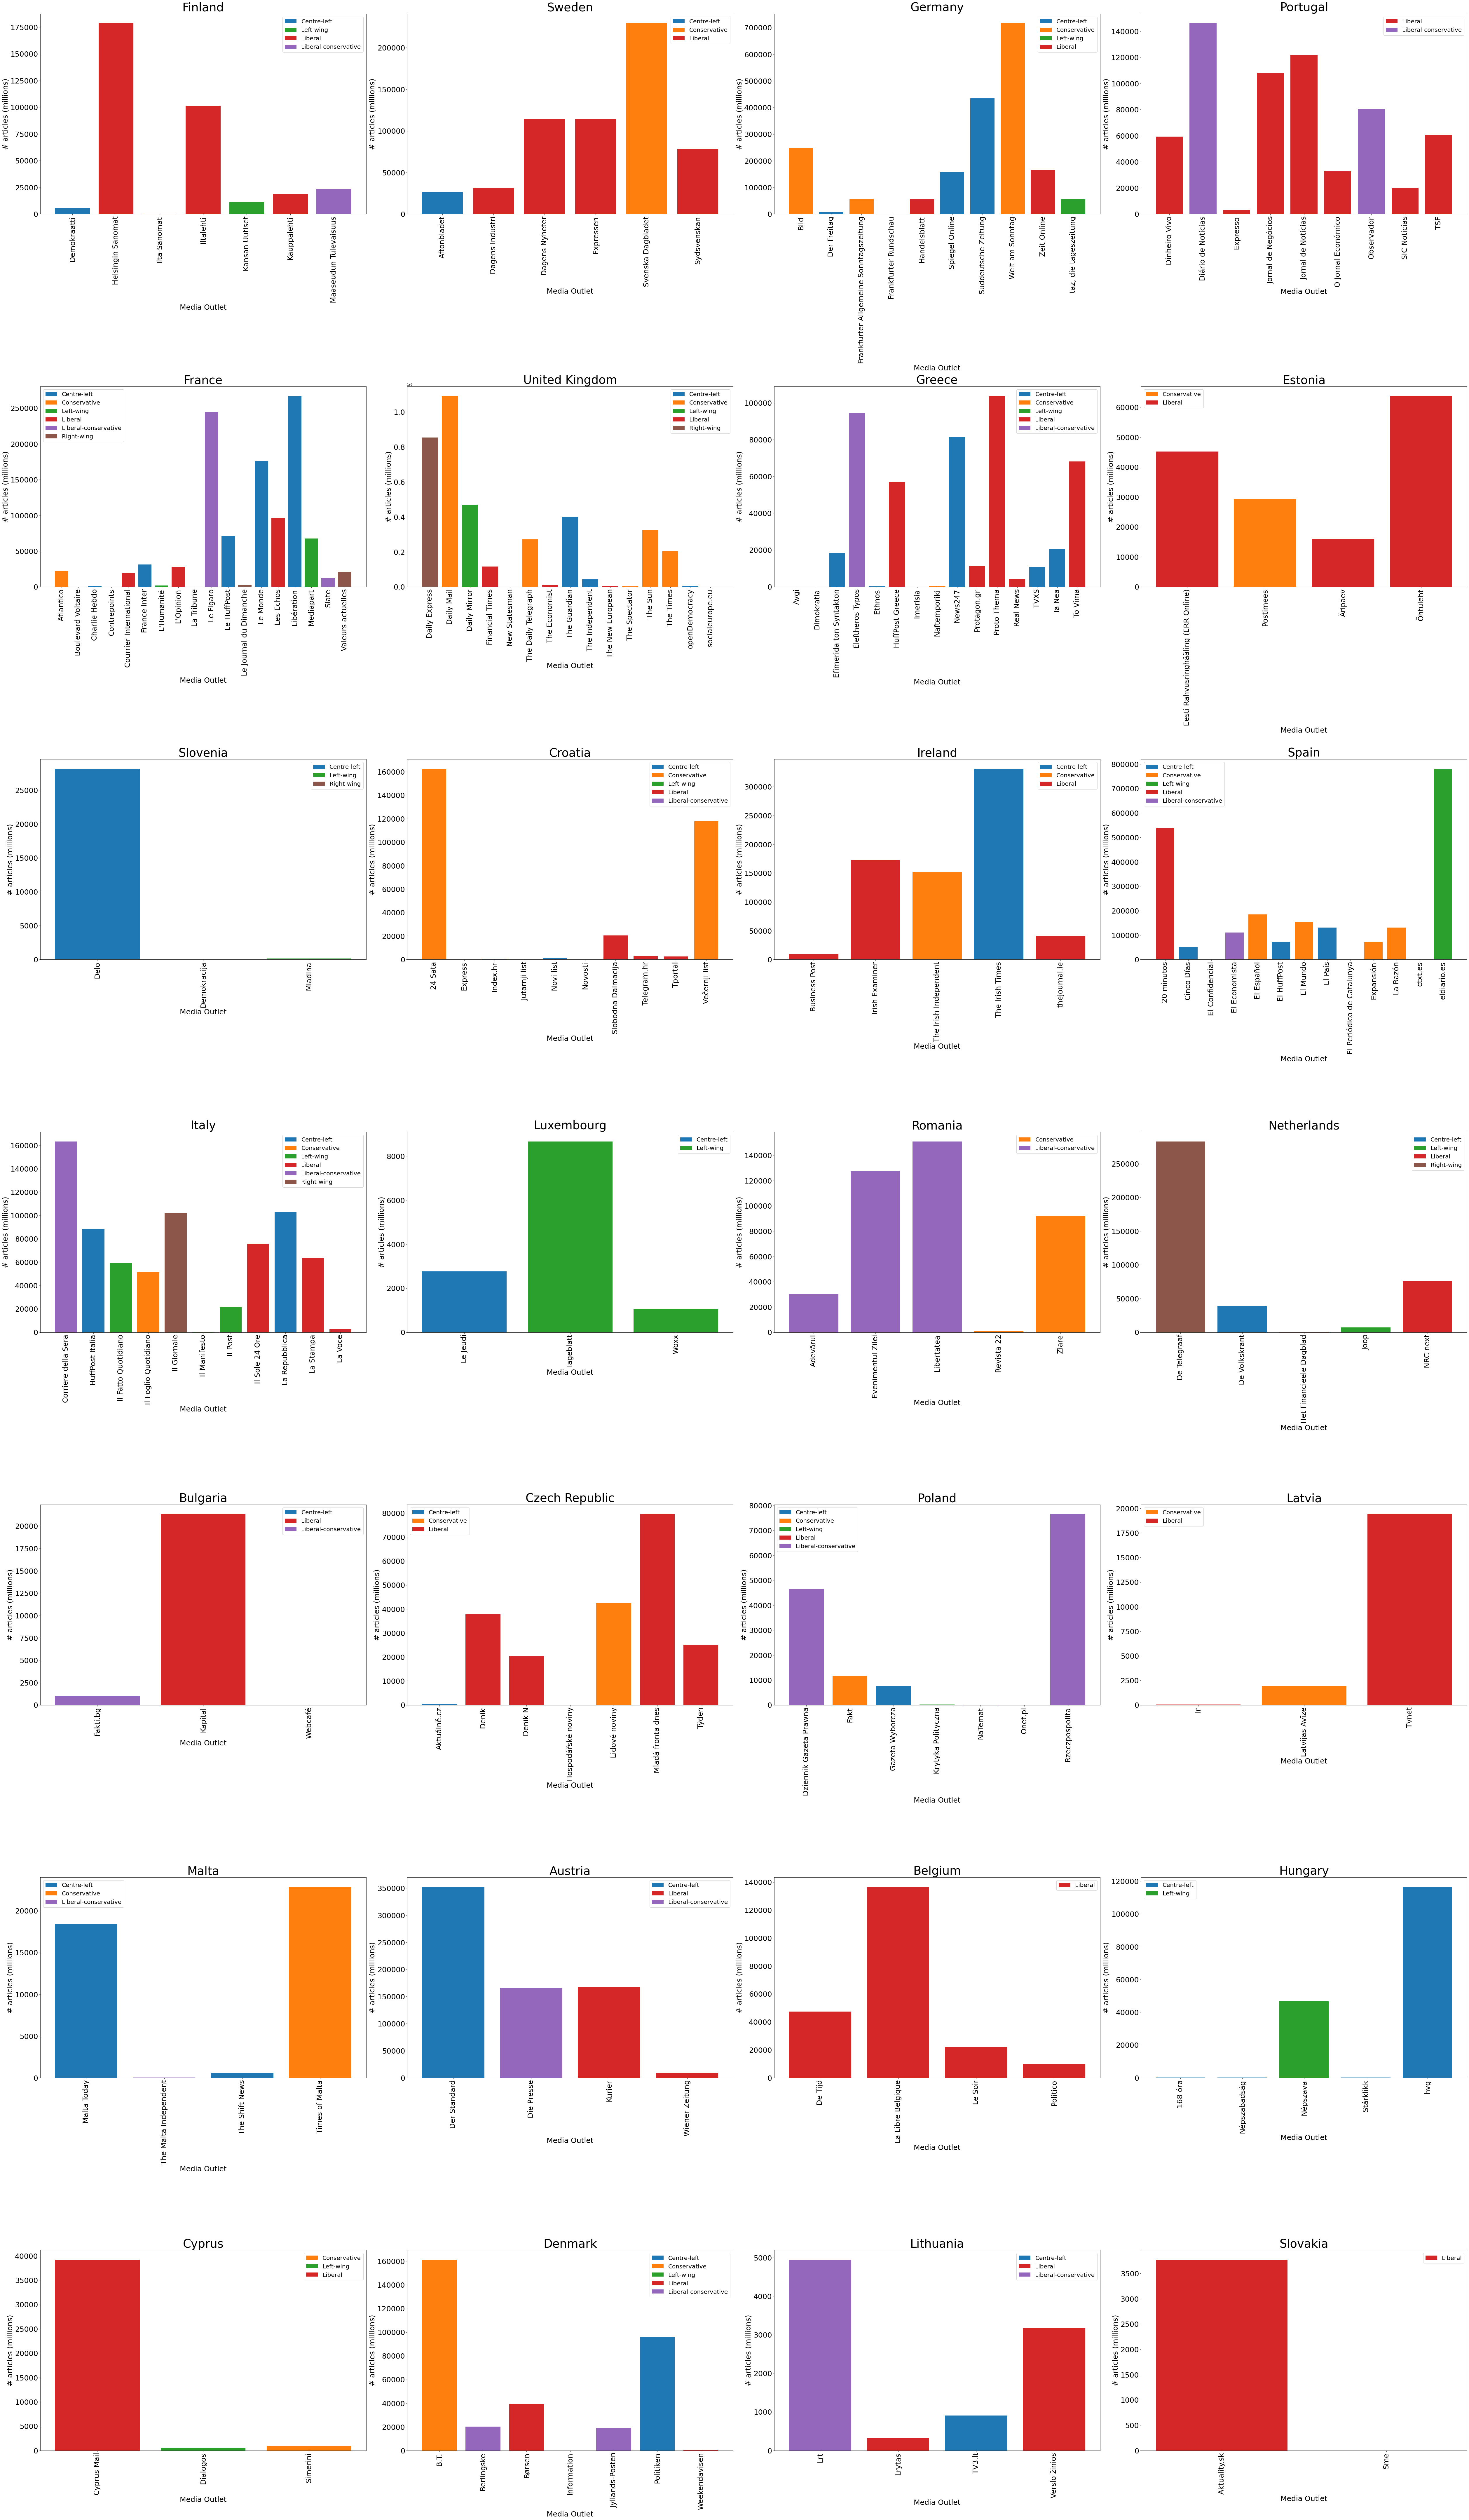

In [23]:
plot_country_media_sources(all_data_with_topic)